In [16]:
import numpy as np
import pandas as pd 
import dask.dataframe as dd
import os
import itertools
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
diretorio = "/media/hdvm03/bd/007/002/007/002"
# anos = sorted(os.listdir(diretorio))
anos_1987_2012 = sorted(os.listdir("/media/hdvm03/bd/007/002/007/002/1987_2012"))
anos_2013_2016 = sorted(os.listdir("/media/hdvm03/bd/007/002/007/002/2013_2016"))
anos_2017_2021 = sorted(os.listdir("/media/hdvm03/bd/007/002/007/002/2017_2020"))

df_1987_2012 = []
df_2013_2016 = []
df_2017_2021 = []
# df_geral = []

for ano_1987, ano_2013, ano_2017 in itertools.zip_longest(anos_1987_2012, anos_2013_2016, anos_2017_2021):
    csv_1987 = os.path.join(f'{diretorio}/1987_2012', ano_1987)
    teses = pd.read_csv(csv_1987, sep=";", encoding='latin-1', on_bad_lines='skip', low_memory=False)
    df_1987_2012.append(teses)
    # print("1987 - OK")
    if ano_2013 != None:
        csv_2013 = os.path.join(f'{diretorio}/2013_2016', ano_2013)
        teses2 = pd.read_csv(csv_2013, sep=";", encoding='latin-1', on_bad_lines='skip', low_memory=False)
        df_2013_2016.append(teses2)
    # print("2013 - OK")
    if ano_2017 != None:
        csv_2017 = os.path.join(f'{diretorio}/2017_2020', ano_2017)
        teses3 = pd.read_csv(csv_2017, sep=";", encoding='latin-1', on_bad_lines='skip', low_memory=False)
        df_2017_2021.append(teses3)
        # print("2017 - OK")
        
df_1987_2012_final = pd.concat(df_1987_2012, ignore_index=True)
print(f"1987 - OK - concat  - {df_1987_2012_final.shape} ")
df_2013_2016_final = pd.concat(df_2013_2016, ignore_index=True)
print(f"2013 - OK - concat - {df_2013_2016_final.shape}")
df_2017_2021_final = pd.concat(df_2017_2021, ignore_index=True)
print(f"2017 - OK - concat - {df_2017_2021_final.shape}")
# print(df_1987_2012_final)
# print(df_2013_2016_final)


1987 - OK - concat  - (676338, 41) 
2013 - OK - concat - (294364, 56)
2016 - OK - concat - (350396, 58)


In [4]:
tipos_1987 = []
for column in df_1987_2012_final.columns:
    nome_coluna = column
    tipos_coluna = pd.api.types.infer_dtype(df_1987_2012_final[column])
    lista_coluna_tipos = [nome_coluna, tipos_coluna]

    tipos_1987.append(lista_coluna_tipos)
print(tipos_1987)


[['AnoBase', 'integer'], ['CodigoPrograma', 'string'], ['Regiao', 'string'], ['Uf', 'string'], ['SiglaIes', 'string'], ['NomeIes', 'string'], ['NomePrograma', 'string'], ['GrandeAreaCodigo', 'integer'], ['GrandeAreaDescricao', 'string'], ['AreaConhecimentoCodigo', 'integer'], ['AreaConhecimento', 'string'], ['AreaAvaliacao', 'string'], ['DocumentoDiscente', 'string'], ['Autor', 'string'], ['TituloTese', 'string'], ['Nivel', 'string'], ['DataDefesa', 'string'], ['PalavrasChave', 'string'], ['Volume', 'integer'], ['NumeroPaginas', 'integer'], ['BibliotecaDepositaria', 'string'], ['Idioma', 'string'], ['ResumoTese', 'string'], ['LinhaPesquisa', 'string'], ['URLTextoCompleto', 'string'], ['DocumentoOrientador_1', 'string'], ['Orientador_1', 'string'], ['DocumentoOrientador_2', 'string'], ['Orientador_2', 'string'], ['DocumentoOrientador_3', 'string'], ['Orientador_3', 'string'], ['DocumentoOrientador_4', 'string'], ['Orientador_4', 'string'], ['DocumentoCoOrientador_1', 'string'], ['CoOrie

In [5]:
# tipos_2013 = []
# for column in df_2013_2016_final.columns:
#     nome_coluna = column
#     tipos_coluna = pd.api.types.infer_dtype(df_2013_2016_final[column])
#     lista_coluna_tipos = [nome_coluna, tipos_coluna]

#     tipos_2013.append(lista_coluna_tipos)
# print(tipos_2013)

# tipos_2013_2016 = set(df_2013_2016_final["DH_FIM_AREA_CONC"].apply(lambda x: type(x)))
# print(tipos_2013_2016)
df_2013_2016_final.convert_dtypes().dtypes
# df_2013_2016_final[["DH_FIM_AREA_CONC", "DH_FIM_LINHA", "ID_AREA_CONCENTRACAO", "ID_LINHA_PESQUISA", "ID_PROJETO", ]].sample(40, random_state=1)
# df_2013_2016_final["NR_VOLUME"].unique()




AN_BASE                         Int64
CD_PROGRAMA                    string
NM_PROGRAMA                    string
SG_ENTIDADE_ENSINO             string
NM_ENTIDADE_ENSINO             string
ID_ADD_PRODUCAO_INTELECTUAL     Int64
ID_PRODUCAO_INTELECTUAL         Int64
NM_PRODUCAO                    string
ID_SUBTIPO_PRODUCAO             Int64
NM_SUBTIPO_PRODUCAO            string
ID_AREA_CONCENTRACAO            Int64
NM_AREA_CONCENTRACAO           string
ID_LINHA_PESQUISA               Int64
NM_LINHA_PESQUISA              string
ID_PROJETO                      Int64
NM_PROJETO                     string
DH_INICIO_AREA_CONC            string
DH_FIM_AREA_CONC               string
DH_INICIO_LINHA                string
DH_FIM_LINHA                   string
DT_TITULACAO                   string
DS_PALAVRA_CHAVE               string
DS_ABSTRACT                    string
DS_KEYWORD                     string
IN_TRABALHO_MESMA_AREA          Int64
NM_TP_VINCULO                  string
IN_ORIENT_PA

In [6]:
# tipos_2017 = []
# for column in df_2017_2021_final.columns:
#     nome_coluna = column
#     tipos_coluna = pd.api.types.infer_dtype(df_2017_2021_final[column])
#     lista_coluna_tipos = [nome_coluna, tipos_coluna]

#     tipos_2017.append(lista_coluna_tipos)
# print(tipos_2017)

# df_2017_2021_final[["DH_FIM_AREA_CONC", "DH_FIM_LINHA", "ID_AREA_CONCENTRACAO", "ID_LINHA_PESQUISA", "ID_PROJETO", "NR_VOLUME"]].sample(15, random_state=1)
# df_2017_2021_final["ID_PESSOA_ORIENTADOR"]

df_2017_2021_final.convert_dtypes().dtypes

AN_BASE                         Int64
CD_PROGRAMA                    string
NM_PROGRAMA                    string
SG_ENTIDADE_ENSINO             string
NM_ENTIDADE_ENSINO             string
ID_ADD_PRODUCAO_INTELECTUAL     Int64
ID_PRODUCAO_INTELECTUAL         Int64
NM_PRODUCAO                    string
ID_SUBTIPO_PRODUCAO             Int64
NM_SUBTIPO_PRODUCAO            string
ID_AREA_CONCENTRACAO            Int64
NM_AREA_CONCENTRACAO           string
ID_LINHA_PESQUISA               Int64
NM_LINHA_PESQUISA              string
ID_PROJETO                      Int64
NM_PROJETO                     string
DH_INICIO_AREA_CONC            string
DH_FIM_AREA_CONC               string
DH_INICIO_LINHA                string
DH_FIM_LINHA                   string
DT_TITULACAO                   string
DS_PALAVRA_CHAVE               string
DS_ABSTRACT                    string
DS_KEYWORD                     string
IN_TRABALHO_MESMA_AREA          Int64
NM_TP_VINCULO                  string
IN_ORIENT_PA

In [7]:
df_1987_2012_final.to_csv(f'{diretorio}/geral/01_dados_1987_2012.csv', index=False)
print("1987 - OK - CSV")
df_2013_2016_final.to_csv(f'{diretorio}/geral/01_dados_2013_2016.csv', index=False)
print("2013 - OK - CSV")
df_2017_2021_final.to_csv(f'{diretorio}/geral/01_dados_2017_2020.csv', index=False)
print("2017 - OK - CSV")

1987 - OK - CSV
2013 - OK - CSV
2017 - OK - CSV


In [8]:
diretorio = "/media/hdvm03/bd/007/002/007/002"

print("csv_1987_2012")
csv_1987_2012 = pd.read_csv(f'{diretorio}/geral/01_dados_1987_2012.csv', on_bad_lines='skip', low_memory=False)
busca1 = csv_1987_2012[csv_1987_2012["TituloTese"].str.contains("mercosul|mercosur", case=False, na=False)]
agrupar_por_ano1 = busca1["TituloTese"].groupby(busca1["AnoBase"])
busca_por_ano1 = agrupar_por_ano1.count()
quant_termos1 = busca_por_ano1.values.tolist()
anos1 = busca_por_ano1.index.tolist()

print("csv_2013_2016")
csv_2013_2016 = pd.read_csv(f'{diretorio}/geral/01_dados_2013_2016.csv', on_bad_lines='skip', low_memory=False)
busca2 = csv_2013_2016[csv_2013_2016["NM_PRODUCAO"].str.contains("mercosul|mercosur", case=False, na=False)]
agrupar_por_ano2 = busca2["NM_PRODUCAO"].groupby(busca2["AN_BASE"])
busca_por_ano2 = agrupar_por_ano2.count()
quant_termos2 = busca_por_ano2.values.tolist()
anos2 = busca_por_ano2.index.tolist()

print("csv_2017_2021")
csv_2017_2021 = pd.read_csv(f'{diretorio}/geral/01_dados_2017_2020.csv', on_bad_lines='skip', low_memory=False)
busca3 = csv_2017_2021[csv_2017_2021["NM_PRODUCAO"].str.contains("mercosul|mercosur", case=False, na=False)]
agrupar_por_ano3 = busca3["NM_PRODUCAO"].groupby(busca3["AN_BASE"])
busca_por_ano3 = agrupar_por_ano3.count()
quant_termos3 = busca_por_ano3.values.tolist()
anos3 = busca_por_ano3.index.tolist()

csv_1987_2012
csv_2013_2016
csv_2017_2021


<AxesSubplot:xlabel='AnoBase'>

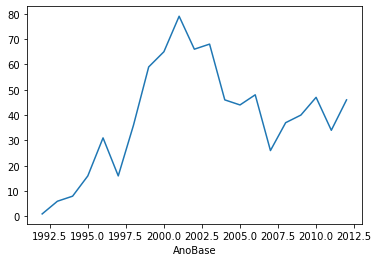

In [11]:
fig_pandas = busca_por_ano1.plot(kind="line", x=anos1, y=quant_termos1)
fig_pandas

<AxesSubplot:xlabel='AN_BASE'>

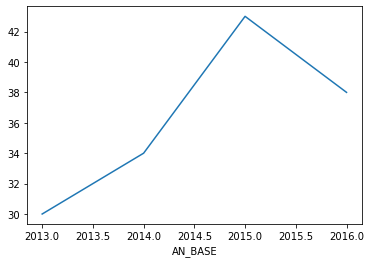

In [12]:
fig_pandas = busca_por_ano2.plot(kind="line", x=anos2, y=quant_termos2)
fig_pandas

<AxesSubplot:xlabel='AN_BASE'>

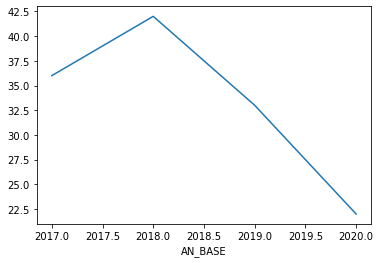

In [13]:
fig_pandas = busca_por_ano3.plot(kind="line", x=anos3, y=quant_termos3)
fig_pandas

In [ ]:
plt.plot(x=anos1, y=quant_termos1, c='r', ls="-", lw="2", marker ="o", ms=8, fillstyle="full")

plt.show()

In [28]:
print(f"2013-2020 - OK - concat")
csv_2013_2020 = pd.concat([csv_2013_2016, csv_2017_2021], ignore_index=True)

print("2013-2020 - OK - CSV")
csv_2013_2020.to_csv(f'{diretorio}/geral/01_dados_2013_2020.csv', index=False)


2013-2020 - OK - concat
2013-2020 - OK - CSV


In [30]:
csv_2013_2020 = pd.read_csv(f'{diretorio}/geral/01_dados_2013_2020.csv', on_bad_lines='skip', low_memory=False)
busca4= csv_2013_2020[csv_2013_2020["NM_PRODUCAO"].str.contains("mercosul|mercosur", case=False, na=False)]
agrupar_por_ano4 = busca4["NM_PRODUCAO"].groupby(busca4["AN_BASE"])
busca_por_ano4 = agrupar_por_ano4.count()
quant_termos4 = busca_por_ano4.values.tolist()
anos4 = busca_por_ano4.index.tolist()



In [77]:
agrupar_por_ano4

<AxesSubplot:xlabel='AN_BASE'>

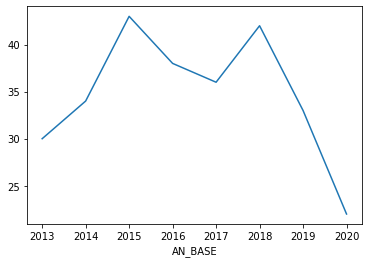

In [31]:
fig_pandas = busca_por_ano4.plot(kind="line", x=anos4, y=quant_termos4)
fig_pandas

In [19]:
fig = px.line(x=anos1, y=quant_termos1, markers="O")

fig.show()

In [32]:
fig = px.line(x=anos4, y=quant_termos4, markers="O")

fig.show()

In [40]:
anos_total = list(range(1992,2021))
print(f'Lista de anos: {anos_total}')
print(f'1992-2012: {quant_termos1}')
print(f'2013-2020: {quant_termos4}')

quant_termos5 = quant_termos1 + quant_termos4


Lista de anos: [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
1992-2012: [1, 6, 8, 16, 31, 16, 36, 59, 65, 79, 66, 68, 46, 44, 48, 26, 37, 40, 47, 34, 46]
2013-2020: [30, 34, 43, 38, 36, 42, 33, 22]


In [41]:
fig = px.line(x=anos_total, y=quant_termos5, markers="O")

fig.show()

In [86]:
teses = [anos_total, quant_termos5]
teses_1992_2020 = pd.DataFrame(quant_termos5, anos_total)
teses_total = teses_1992_2020.T
